# **SOMMAIRE :**
 - <a href="#A1">**Chargement des librairies importées**</a>

 - <a href="#A2">**Chargement des données**</a>

 - <a href="#A3">**Display**</a>

 - <a href="#A4">**Methodes de regression linéaire**</a>

 - <a href="#A5">**Methodes de regression non-linéaire**</a>

 - <a href="#A6">**CHOIX DE LA MEILLEURE METHODE DE PREDICTION**</a>

> #  **TRAITE :** PREDICTION AVEC LA VARIABLE TARGET **TotalGHGEmissions**

# <a name="A1">**Chargement des ibrairies à importées**</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <a name="A2">**Chargement des données**</a>

In [2]:
df_for_prediction = pd.read_csv('df_for_prediction.csv')

Display

In [3]:
df_for_prediction.head()

,Campus,NonResidential,Nonresidential COS,SPS-District K-12,PrimaryPropertyType,ENERGYSTARScore,YearBuiltEncoded,NumberofFloors,PropertyGFATotal,PropertyGFAParking,SiteEnergyUse(kBtu),TotalGHGEmissions
0,0,1,0,0,Hotel,60.0,27.0,2.564949,11.390023,0.000000,15.793246,5.525373
1,0,1,0,0,Hotel,61.0,93.0,2.484907,11.547974,9.620129,15.942305,5.693261
2,0,1,0,0,Hotel,43.0,66.0,3.737670,13.770629,12.189532,18.100297,7.645053
3,0,1,0,0,Hotel,56.0,26.0,2.397895,11.023878,0.000000,15.731637,5.660979
4,0,1,0,0,Hotel,75.0,77.0,2.944439,12.075856,11.034906,16.466822,6.226556


# <a name="A3"> **Methodes de regression linéaire** </a>

> ## **Modèle de régression lineaire classique**

In [ ]:
df_for_prediction.columns

Index(['Campus', 'NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'PrimaryPropertyType', 'ENERGYSTARScore', 'YearBuiltEncoded',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
      dtype='object')

Spécifions X et y

In [ ]:
X = df_for_prediction.loc[:, ~df_for_prediction.columns.isin(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])]
X.head()

,Campus,NonResidential,Nonresidential COS,SPS-District K-12,PrimaryPropertyType,ENERGYSTARScore,YearBuiltEncoded,NumberofFloors,PropertyGFATotal,PropertyGFAParking
0,0,1,0,0,Hotel,60.0,27.0,2.564949,11.390023,0.000000
1,0,1,0,0,Hotel,61.0,93.0,2.484907,11.547974,9.620129
2,0,1,0,0,Hotel,43.0,66.0,3.737670,13.770629,12.189532
3,0,1,0,0,Hotel,56.0,26.0,2.397895,11.023878,0.000000
4,0,1,0,0,Hotel,75.0,77.0,2.944439,12.075856,11.034906


In [ ]:
y = df_for_prediction['TotalGHGEmissions']
y.head()

0    5.525373
1    5.693261
2    7.645053
3    5.660979
4    6.226556
Name: TotalGHGEmissions, dtype: float64

Partitionnons nos données en données Train et Test

In [ ]:
from sklearn import model_selection

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3
                                                                    )

>>Effectuons un TARGET encoder sur la variable **PrimaryPropertyType**

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import category_encoders as ce

In [ ]:
# Créer un encodeur target pour la variable 'PrimaryPropertyType'
encoder = ce.TargetEncoder(cols=['PrimaryPropertyType'])
encoder

TargetEncoder(cols=['PrimaryPropertyType'])

In [ ]:
# Appliquer l'encodeur sur les données
X_train['PrimaryEncoded'] = encoder.fit_transform(X_train['PrimaryPropertyType'], y_train)  
X_train.head()

,Campus,NonResidential,Nonresidential COS,SPS-District K-12,PrimaryPropertyType,ENERGYSTARScore,YearBuiltEncoded,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PrimaryEncoded
560,0,1,0,0,Warehouse,83.0,85.0,1.609438,11.796818,0.0,3.118778
403,0,1,0,0,Distribution Center,56.0,59.0,1.098612,11.438126,0.0,3.424965
742,0,1,0,0,Small- and Mid-Sized Office,95.0,55.0,1.098612,9.972874,0.0,3.291492
1131,0,1,0,0,Small- and Mid-Sized Office,83.0,64.0,1.098612,9.919262,0.0,3.291492
787,0,1,0,0,Senior Care Community,73.0,67.0,1.098612,10.748067,0.0,4.494292


In [ ]:
X_test['PrimaryEncoded'] = encoder.transform(X_test['PrimaryPropertyType'], y_test)
X_test.head()

,Campus,NonResidential,Nonresidential COS,SPS-District K-12,PrimaryPropertyType,ENERGYSTARScore,YearBuiltEncoded,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PrimaryEncoded
1149,0,1,0,0,Warehouse,69.0,26.0,1.098612,9.923339,0.000000,3.118778
1282,0,1,0,0,Residence Hall,71.0,78.0,1.609438,10.065351,7.701652,4.076352
276,0,1,0,0,Large Office,95.0,106.0,1.791759,12.125313,11.100964,4.921402
949,0,1,0,0,Distribution Center,22.0,77.0,0.693147,10.090009,0.000000,3.424965
744,0,1,0,0,Small- and Mid-Sized Office,71.0,103.0,1.609438,10.594808,9.425532,3.291492


In [ ]:
X_train_reg = X_train.drop(columns='PrimaryPropertyType')
X_test_reg = X_test.drop(columns='PrimaryPropertyType')

In [ ]:
X_train_reg.head()

,Campus,NonResidential,Nonresidential COS,SPS-District K-12,ENERGYSTARScore,YearBuiltEncoded,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PrimaryEncoded
560,0,1,0,0,83.0,85.0,1.609438,11.796818,0.0,3.118778
403,0,1,0,0,56.0,59.0,1.098612,11.438126,0.0,3.424965
742,0,1,0,0,95.0,55.0,1.098612,9.972874,0.0,3.291492
1131,0,1,0,0,83.0,64.0,1.098612,9.919262,0.0,3.291492
787,0,1,0,0,73.0,67.0,1.098612,10.748067,0.0,4.494292


In [ ]:
X_test_reg.head()

,Campus,NonResidential,Nonresidential COS,SPS-District K-12,ENERGYSTARScore,YearBuiltEncoded,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PrimaryEncoded
1149,0,1,0,0,69.0,26.0,1.098612,9.923339,0.000000,3.118778
1282,0,1,0,0,71.0,78.0,1.609438,10.065351,7.701652,4.076352
276,0,1,0,0,95.0,106.0,1.791759,12.125313,11.100964,4.921402
949,0,1,0,0,22.0,77.0,0.693147,10.090009,0.000000,3.424965
744,0,1,0,0,71.0,103.0,1.609438,10.594808,9.425532,3.291492


La première étape est d'effectuer une régression linéaire classique afin de récupérer une erreur baseline, qu'on souhaite améliorer à l'aide des techniques de régularisation.

In [ ]:
# Importons les librairies
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

On crée un modèle de régression linéaire

In [ ]:
linreg = LinearRegression()

In [ ]:
import time

In [ ]:
# Mesurons le temps d'exécution de la fonction fit()
start_time = time.time() 

On entraîne ce modèle sur les données d'entrainement

In [ ]:
linreg.fit(X_train_reg, y_train)

LinearRegression()

> Mesurons le temps d'exécution à l'entrainement

In [ ]:
fit_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction fit(): {:.2f} ms".format(fit_time))

Temps d'exécution de la fonction fit(): 22.23 ms


In [ ]:
# Mesurer le temps d'exécution de la fonction predict()
start_time = time.time()

Nous allons faire des prédictions sur l'ensemble de test

In [ ]:
y_pred = linreg.predict(X_test_reg)

> Mesurons le temps d'exécution à la prédiction

In [ ]:
predict_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction predict(): {:.2f} ms".format(predict_time))

Temps d'exécution de la fonction predict(): 27.74 ms


La baseline :

calculons l'erreur de norme 2 sur les données de test

In [ ]:
error_norm2 = mean_squared_error(y_test, y_pred, squared=False)
print("On obtient cette erreur quadratique 'RMSE':", error_norm2.round(3))

On obtient cette erreur quadratique 'RMSE': 0.997


calculons les métriques R2_score, RMSE et MAE

In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les métriques
print("R2_score          : ", r2.round(4))                           # Le coefficient de détermination R2 mesure la proportion de la variance dans les données de réponse qui est expliquée par le modèle
print("RMSE              : ", rmse.round(4))
print("MAE               : ", mae.round(4))                               # L'erreur absolue moyenne (MAE) mesure l'erreur moyenne absolue entre les valeurs prédites et les valeurs réelles en termes d'unité de réponse

R2_score          :  0.5405
RMSE              :  0.9972
MAE               :  0.7864


Ces métriques indiquent que le modèle a une performance acceptable mais peut encore être amélioré.

**NB :** 

Il est recommandé de comparer ces résultats à ceux d'autres modèles pour évaluer la performance relative du modèle actuel et identifier des moyens d'amélioration.

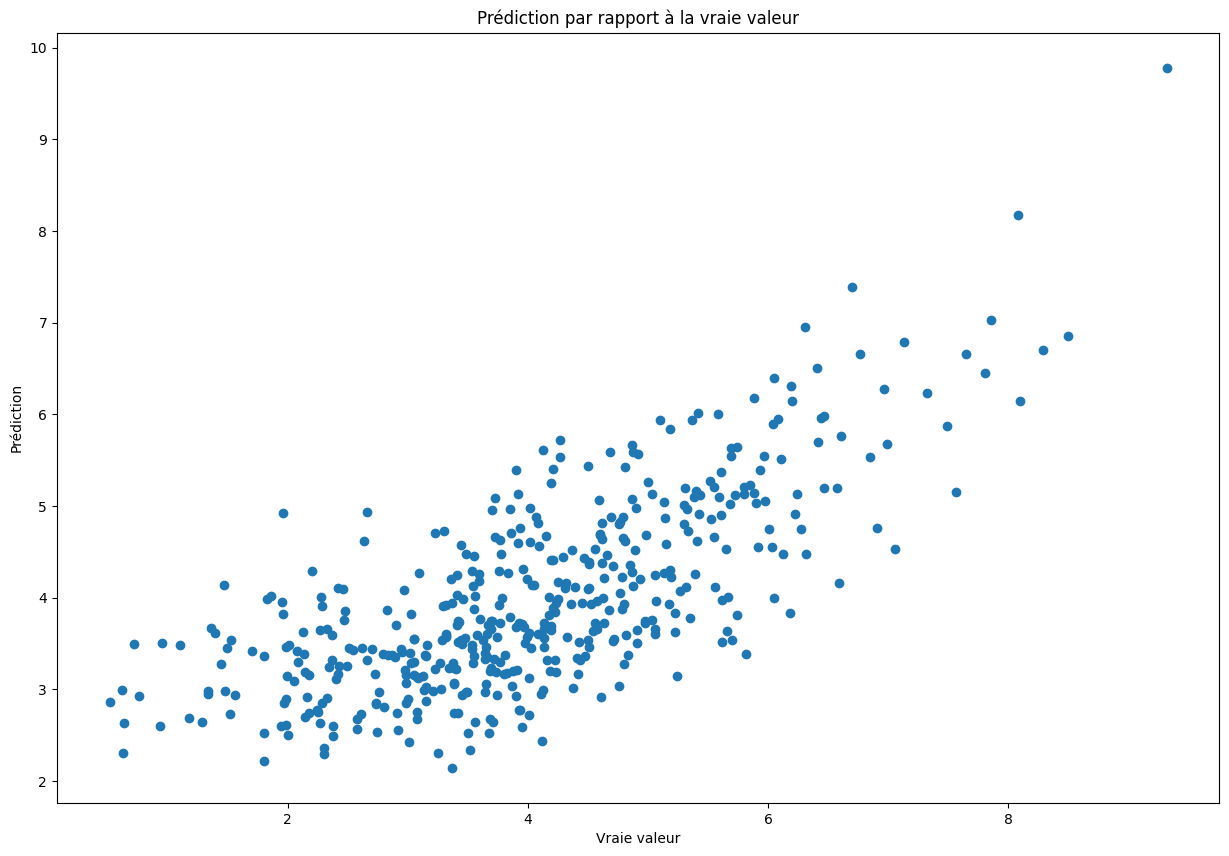

In [ ]:
plt.figure(figsize=(15, 10))

# Tracer le graphique de la prédiction par rapport à la vraie valeur
plt.scatter(y_test, y_pred)
plt.xlabel("Vraie valeur")
plt.ylabel("Prédiction")
plt.title("Prédiction par rapport à la vraie valeur")
plt.show()

> Appliquons la transformation exponentielle sur la RMSE du kBTU sur les prédictions de votre modèle

In [ ]:
# Calculons les prédictions en exp
y_pred_exp = np.exp(y_pred)

In [ ]:
# Calculons la RMSE en exp
rmse_exp = mean_squared_error(np.exp(y_test), y_pred_exp, squared=False)

# Appliquons la transformation exponentielle
rmse_kbtu = rmse_exp

print("RMSE en kBTU      : ", rmse_kbtu.round(4))

RMSE en kBTU      :  463.4392


> ## **Modèle RIDGE et LASSO**

>> ### **Application du RIDGE**

> **Spécifions X et y**

In [6]:
X = df_for_prediction.loc[:, ~df_for_prediction.columns.isin(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])]
X.columns

Index(['Campus', 'NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'PrimaryPropertyType', 'ENERGYSTARScore', 'YearBuiltEncoded',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking'],
      dtype='object')

In [7]:
y = df_for_prediction['TotalGHGEmissions']

> **Partitionnons les données**

In [8]:
from sklearn import model_selection

Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3
                                                                    )

Nous allons commencer par utiliser la méthode "GridSearchCV" pour faire une validation croisée du paramètre k d’un kNN sur le jeu d’entraînement :

In [10]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.9 MB/s eta 0:00:00


In [11]:
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.linear_model import RidgeCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
# Définir le pipeline pour le target encoding et RidgeCV
pipe = Pipeline([
    ('target_encoder', TargetEncoder(cols='PrimaryPropertyType')),  # --> Application du target encoder sur la variable 'PrimaryPropertyType'
    ('ridge_cv', RidgeCV())
])

In [13]:
# Définir la plage de valeurs pour l'hyperparamètre alpha
param_grid = {'ridge_cv__alphas': np.logspace(-4, 4, 9)}  
param_grid

{'ridge_cv__alphas': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
        1.e+04])}

In [14]:
# Définir la fonction pour le scoring personnalisé basé sur RMSE
def custom_score_rmse(y_true, y_pred):
    # Calculer le score RMSE
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return rmse

In [15]:
# Définir la fonction pour le scoring personnalisé basé sur MAE
def custom_score_mae(y_true, y_pred):
    # Calculer le score MAE
    mae = mean_absolute_error(y_true, y_pred)
    return mae

In [16]:
# Initialiser l'objet GridSearchCV pour la recherche d'hyperparamètre
grid_search = GridSearchCV(pipe, param_grid, cv=KFold(n_splits=5), 
                           scoring={'custom_score_rmse': make_scorer(custom_score_rmse), 
                                    'custom_score_mae': make_scorer(custom_score_mae),
                                    'r2_score': make_scorer(r2_score)},
                                    refit='r2_score')

In [17]:
# Exécuter la recherche d'hyperparamètre sur les données d'entraînement
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('target_encoder',
                                        TargetEncoder(cols='PrimaryPropertyType')),
                                       ('ridge_cv', RidgeCV())]),
             param_grid={'ridge_cv__alphas': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             refit='r2_score',
             scoring={'custom_score_mae': make_scorer(custom_score_mae),
                      'custom_score_rmse': make_scorer(custom_score_rmse),
                      'r2_score': make_scorer(r2_score)})

In [18]:
# Afficher les meilleurs paramètres et les scores obtenus
print("Best parameters: ", grid_search.best_params_)
print("RMSE :", grid_search.cv_results_['mean_test_custom_score_rmse'][grid_search.best_index_].round(4))
print("MAE : ", grid_search.cv_results_['mean_test_custom_score_mae'][grid_search.best_index_].round(4))
print("R2 :  ", grid_search.cv_results_['mean_test_r2_score'][grid_search.best_index_].round(4))

Best parameters:  {'ridge_cv__alphas': 10.0}
RMSE : 1.0028
MAE :  0.7869
R2 :   0.5002


>> Mesure du temps d'exécution à l'entrainement

In [19]:
import time

In [20]:
# Mesurer le temps d'exécution de la fonction fit()
start_time = time.time()

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

fit_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction fit(): {:.2f} ms".format(fit_time))

Temps d'exécution de la fonction fit(): 28.96 ms


> Nous allons faire des prédictions sur l'ensemble de test

In [21]:
y_pred = grid_search.predict(X_test)

>> Mesure du temps d'exécution à la prediction

In [22]:
# Mesurer le temps d'exécution de la fonction predict()
start_time = time.time()

y_pred = best_model.predict(X_test)

predict_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction predict(): {:.2f} ms".format(predict_time))

Temps d'exécution de la fonction predict(): 13.73 ms


 Calculons le score RMSE sur l'ensemble de test

In [23]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Score RMSE sur je jeu de test : {:.4f}".format(rmse))

Score RMSE sur je jeu de test : 1.0601


> Appliquons la **transformation exponentielle sur la RMSE du kBTU** sur les prédictions de votre modèle

In [24]:
# Calculons les prédictions en exp
y_pred_exp = np.exp(y_pred)

In [25]:
# Calculons la RMSE en log
rmse_exp = mean_squared_error(np.exp(y_test), y_pred_exp, squared=False)

# Appliquons la transformation exponentielle
rmse_kbtu = rmse_exp

print("RMSE en kBTU      : ", rmse_kbtu.round(4))

RMSE en kBTU      :  628.084


> **Représentons le chemin de régularisation du RIDGE**

In [26]:
# Extraire les meilleurs paramètres et scores de GridSearchCV
best_params = grid_search.best_params_
custom_rmse_scores = grid_search.cv_results_['mean_test_custom_score_rmse']
custom_mae_scores = grid_search.cv_results_['mean_test_custom_score_mae']
r2_scores = grid_search.cv_results_['mean_test_r2_score']

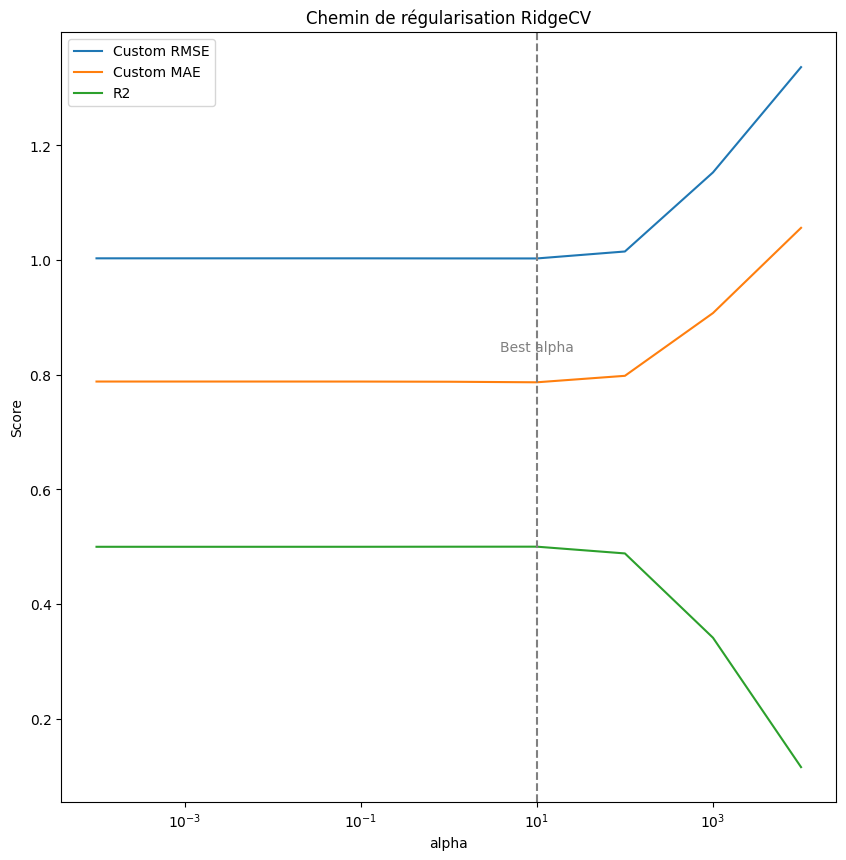

In [27]:
# Tracer les chemins de régularisation pour chaque score en fonction de alpha
plt.figure(figsize=(10, 10))
for score, label in zip([custom_rmse_scores, custom_mae_scores, r2_scores], ['Custom RMSE', 'Custom MAE', 'R2']):
    plt.plot(param_grid['ridge_cv__alphas'], score, label=label)

# Marquer le meilleur alpha sur le graphique
plt.axvline(x=best_params['ridge_cv__alphas'], linestyle='--', color='grey')
plt.text(best_params['ridge_cv__alphas'], max(custom_rmse_scores) - 0.5, s='Best alpha', ha='center', va='bottom', color='grey')

# Ajouter des titres et des légendes
plt.title('Chemin de régularisation RidgeCV')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.xscale('log')
plt.legend()
plt.show()


> **Créons le graphique du coefficient de linéarité en fonction des valeurs de ridge_cv__alphas**

In [28]:
# Récupérons le nom des caractéristiques
feature_names = X_train.columns.tolist()

In [29]:
# Obtenir les coefficients de linéarité pour chaque valeur de alpha
coefs = []
for alpha in np.logspace(-5, 6, 50):
    pipe.set_params(ridge_cv__alphas=alpha)
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['ridge_cv'].coef_)

Affichons le graphique

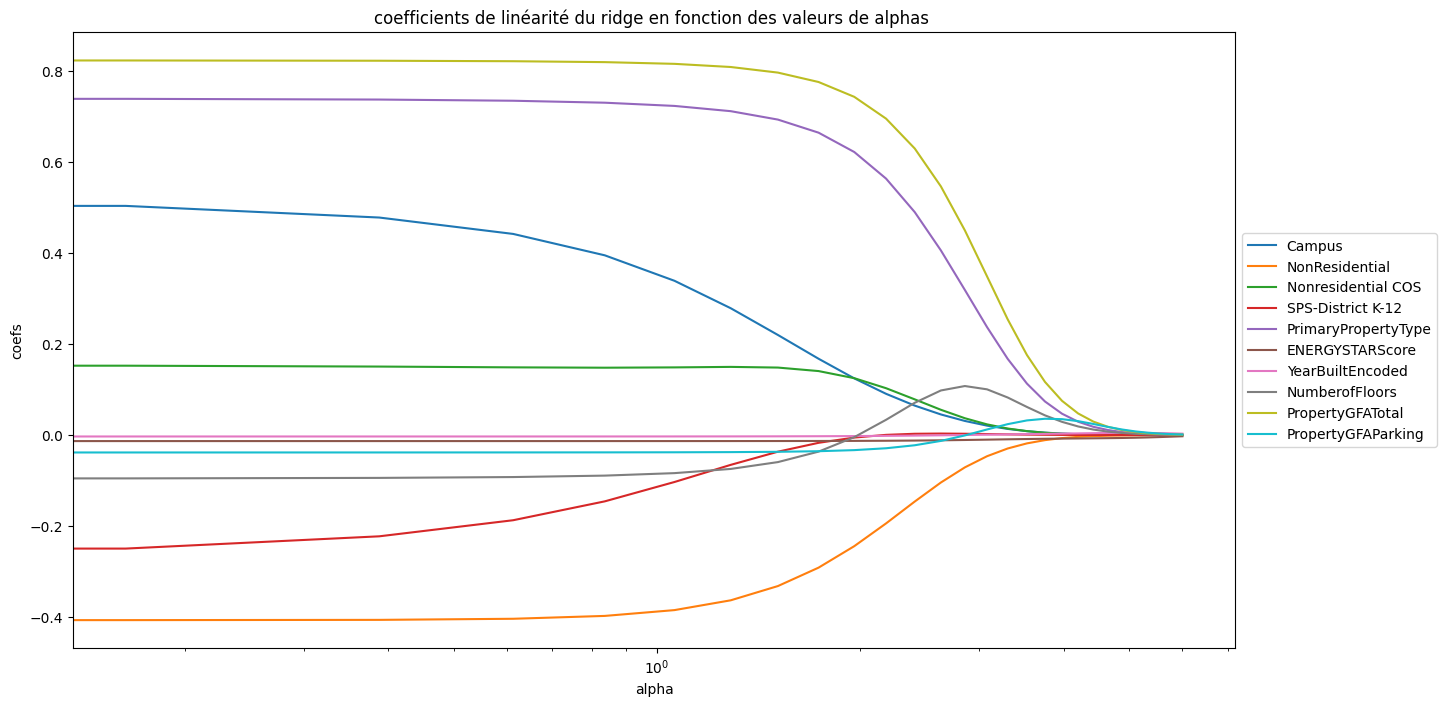

In [30]:
# Tracer le graphique des coefficients en fonction de alpha
plt.figure(figsize=(15, 8))

ax = plt.gca()
ax.plot(np.linspace(-5, 6, 50), coefs)
ax.set_xscale('log')
plt.title('coefficients de linéarité du ridge en fonction des valeurs de alphas ')
plt.xlabel('alpha')
plt.ylabel('coefs')

# Ajouter la légende des caractéristiques en dehors du graphique
plt.legend(labels=feature_names, loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('tight')
plt.show()

>> ### **Application du LASSO**

In [ ]:
X = df_for_prediction.loc[:, ~df_for_prediction.columns.isin(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])]

In [ ]:
y = df_for_prediction['TotalGHGEmissions']

> **Partitionnons les données**

In [ ]:
from sklearn import model_selection

Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3
                                                                    )

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Définition les fonctions de notation personnalisées
def custom_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def custom_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

In [ ]:
# Définir la plage d'alphas à tester
alphas = np.logspace(-4, 4, 9)

In [ ]:
# Créons le pipeline avec l'encodage cible et LassoCV
pipe = Pipeline([('target_encoder', TargetEncoder(cols='PrimaryPropertyType')),
                 ('lasso', LassoCV(cv=KFold(n_splits=5, shuffle=True, random_state=42), alphas=alphas))])

In [ ]:
# Ajustons le pipeline avec le meilleur alpha
pipe.fit(X_train, y_train)

Pipeline(steps=[('target_encoder', TargetEncoder(cols=['PrimaryPropertyType'])),
                ('lasso',
                 LassoCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         cv=KFold(n_splits=5, random_state=42, shuffle=True)))])

> Faire des prédictions sur les données de test

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
# Afficher les meilleurs paramètres et les scores obtenus
lasso_cv = pipe.named_steps['lasso']
print("Best alpha: {}".format(lasso_cv.alpha_))

rmse = custom_rmse(y_test, y_pred)
mae = custom_mae(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE : {:.4f}".format(rmse))
print("MAE  : {:.4f}".format(mae))
print("R2   : {:.4f}".format(r2))

Best alpha: 0.001
RMSE : 1.0293
MAE  : 0.8149
R2   : 0.5267


> Appliquons la **transformation exponentielle sur la RMSE du kBTU** sur les prédictions de votre modèle

In [ ]:
# Calculons les prédictions en exp
y_pred_exp = np.exp(y_pred)

In [ ]:
# Calculons la RMSE en log
rmse_log = mean_squared_error(np.exp(y_test), y_pred_exp, squared=False)

# Appliquons la transformation exponentielle
rmse_kbtu = rmse_exp

print("RMSE en kBTU      : ", rmse_kbtu.round(4))

RMSE en kBTU      :  463.4392


> **Représentons le chemin de régularisation du LASSO**

In [ ]:
alphas = lasso_cv.alphas_
alphas

array([1.e+04, 1.e+03, 1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03,
       1.e-04])

In [ ]:
scores_path = lasso_cv.mse_path_
scores_path

array([[2.23577644, 1.9689795 , 1.86195921, 2.19953307, 1.84948552],
       [2.23577644, 1.9689795 , 1.86195921, 2.19953307, 1.84948552],
       [2.23577644, 1.9689795 , 1.86195921, 2.19953307, 1.84948552],
       [2.23577644, 1.9689795 , 1.86195921, 2.19953307, 1.84948552],
       [2.16083478, 1.98576774, 1.87535913, 2.13437502, 1.76529207],
       [1.01779363, 1.06396842, 0.98562535, 1.22874347, 1.01830079],
       [0.95938909, 0.98194041, 0.93886389, 1.18048008, 0.95754801],
       [0.96640731, 0.9728208 , 0.93590604, 1.17763226, 0.95602365],
       [0.96867376, 0.97212563, 0.93686026, 1.17636751, 0.95643211]])

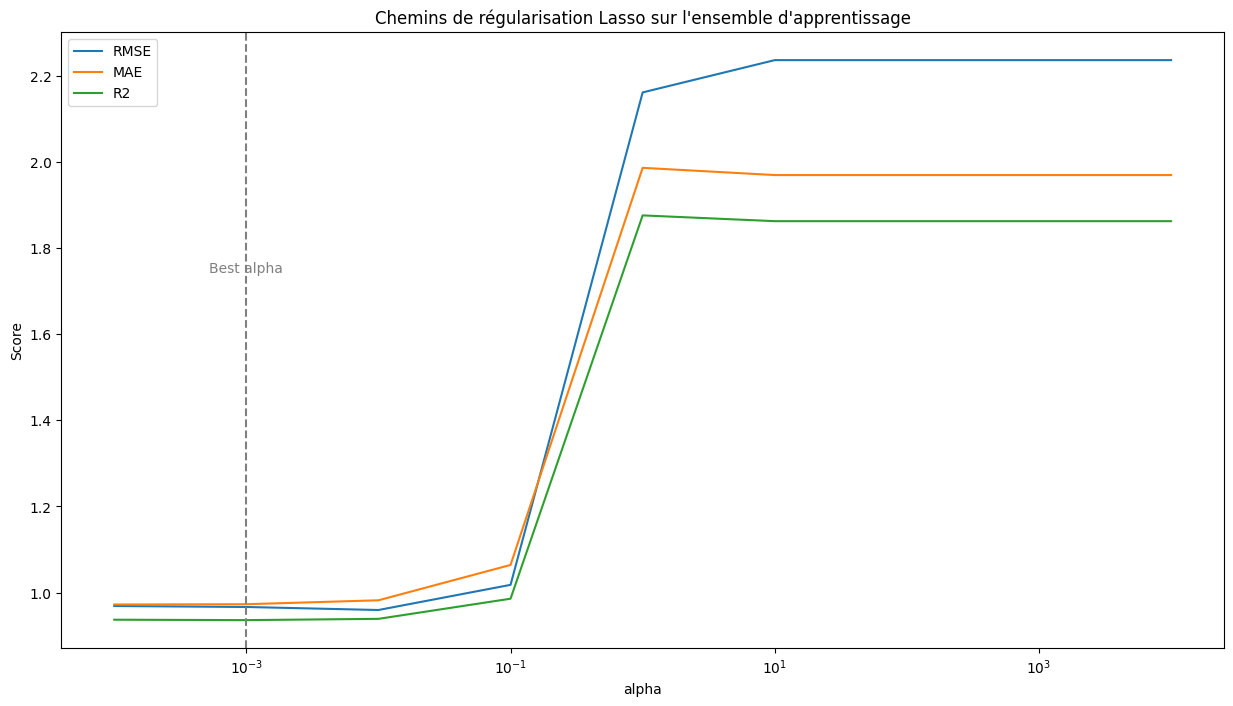

In [ ]:
# Traçons les chemins de régularisation pour chaque score en fonction d'alpha
plt.figure(figsize=(15, 8))
for i, score_label in enumerate(['RMSE', 'MAE', 'R2']):
    plt.plot(alphas, scores_path[:, i], label=score_label)

# Marquons le meilleur alpha sur le graphe
best_alpha = pipe.named_steps['lasso'].alpha_
plt.axvline(x=best_alpha, linestyle='--', color='grey')
plt.text(best_alpha, np.max(scores_path) - 0.5, s='Best alpha', ha='center', va='bottom', color='grey')

plt.title('Chemins de régularisation Lasso sur l\'ensemble d\'apprentissage')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.xscale('log')
plt.legend()
plt.axis('tight')
plt.show()


> Mesurons le temps d'exécution à l'entrainement

In [ ]:
import time

In [ ]:
# Mesurer le temps d'exécution de la fonction fit()
start_time = time.time()

best_model = pipe.set_params(lasso__alphas=[pipe.named_steps['lasso'].alpha_])
best_model.fit(X_train, y_train)

fit_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction fit(): {:.2f} ms".format(fit_time))

Temps d'exécution de la fonction fit(): 33.57 ms


> Mesurons le temps d'exécution à la prédiction

In [ ]:
# Mesurer le temps d'exécution de la fonction predict()
start_time = time.time()

y_pred = best_model.predict(X_test)

predict_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction predict(): {:.2f} ms".format(predict_time))

Temps d'exécution de la fonction predict(): 8.20 ms


> **Créons le graphique du coefficient de linéarité en fonction des valeurs de alphas**

In [ ]:
# Récupérons le nom des caractéristiques
feature_names = X_train.columns.tolist()

In [ ]:
# Obtenir les coefficients de linéarité pour chaque valeur de alpha
coefs = []
for alpha in np.linspace(0.001, 100, 50):
    pipe.named_steps['lasso'].set_params(alphas=[alpha])
    pipe.fit(X_train, y_train)
    coefs.append(pipe.named_steps['lasso'].coef_)


> Affichons le graphique

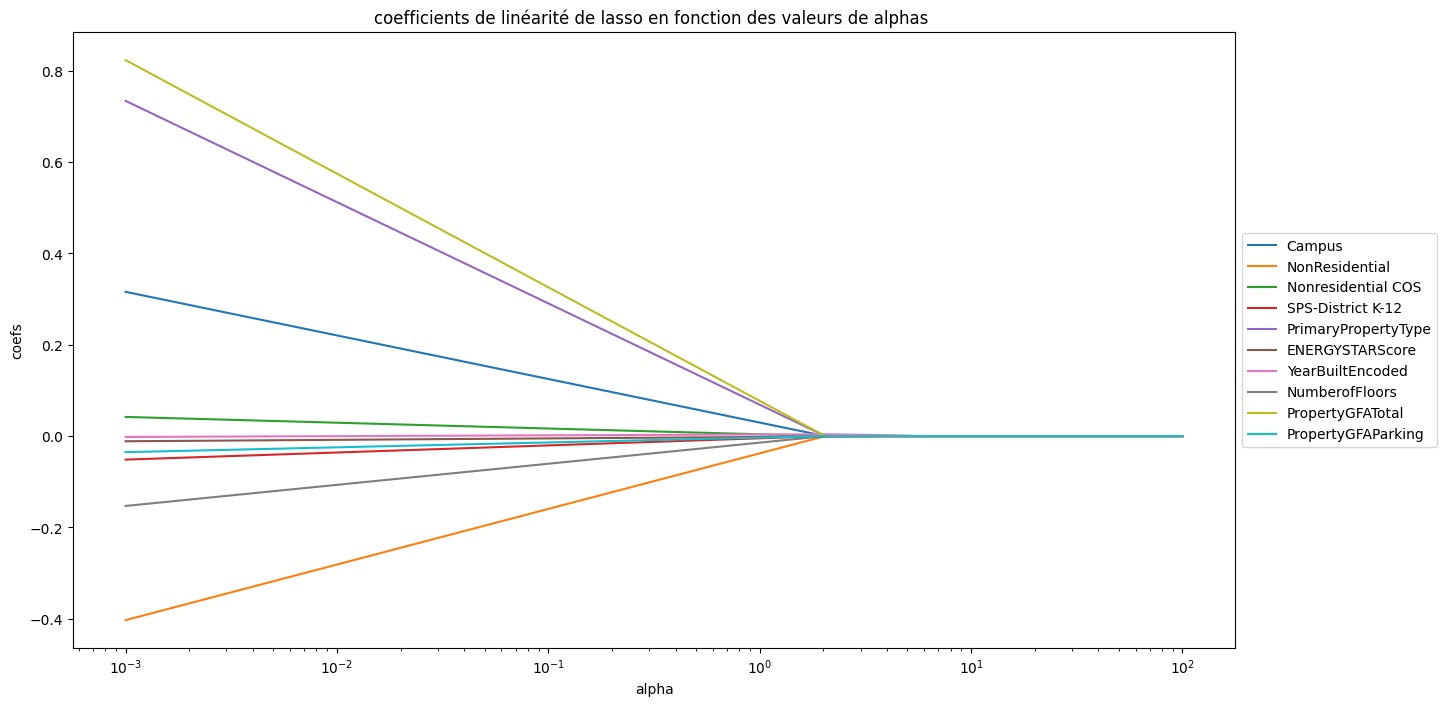

In [ ]:
# Tracer le graphique des coefficients en fonction de alpha
plt.figure(figsize=(15, 8))

ax = plt.gca()
ax.plot(np.linspace(0.001, 100, 50), coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefs')
plt.title('coefficients de linéarité de lasso en fonction des valeurs de alphas ')
plt.axis('tight')

# Ajouter la légende des caractéristiques en dehors du graphique
plt.legend(labels=feature_names, loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('tight')
plt.show()

> ## **Modèle Elastic Net** 

>> Modèle de régression linéaire régularisée qui combine à la fois la régularisation L1 (Lasso) et L2 (Ridge)

In [ ]:
X = df_for_prediction.loc[:, ~df_for_prediction.columns.isin(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])]

In [ ]:
y = df_for_prediction['TotalGHGEmissions']

> **Partitionnons les données**

In [ ]:
from sklearn import model_selection

Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3
                                                                    )

In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Création de la pipeline
pipeline = Pipeline([
    ('encoder', TargetEncoder(cols='PrimaryPropertyType')),
    ('model', ElasticNet())
])

In [ ]:
# Définition des valeurs alpha
alphas = np.logspace(-4, 4, 9)

In [ ]:
# Définition de la méthode des folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Définition d'une liste pour stocker les résultats de chaque itération
best_results = []

# Boucle sur les valeurs alpha
for alpha in alphas:
    # Mise à jour du paramètre alpha de la pipeline
    pipeline.set_params(model__alpha=alpha)
    
    # Boucle sur chaque fold
    for train_index, test_index in kf.split(X_train):
        # Extraction des données d'entraînement et de test
        X_fold_train, X_fold_test = X_train.iloc[train_index], X_train.iloc[test_index]
        y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Entraînement et évaluation du modèle sur le fold courant
        pipeline.fit(X_fold_train, y_fold_train)

        y_pred = pipeline.predict(X_fold_test)

        # Calcul des métriques
        rmse = mean_squared_error(y_fold_test, y_pred, squared=False)
        mse = mean_squared_error(y_fold_test, y_pred)
        mae = mean_absolute_error(y_fold_test, y_pred)
        r2 = r2_score(y_fold_test, y_pred)
        
        # Ajout des métriques à la liste de résultats si alpha est le meilleur
        if len(best_results) == 0 or mse < best_results[0]['mse']:
            best_results.append({'alpha': alpha, 'rmse': rmse, 'mse': mse, 'mae': mae, 'r2': r2})


Affichons les meilleures métriques pour le meilleur alpha

In [ ]:
best_alpha = best_results[0]['alpha']
best_rmse = best_results[0]['rmse']
best_mse = best_results[0]['mse']
best_mae = best_results[0]['mae']
best_r2 = best_results[0]['r2']

print('Meilleur Alpha :', best_alpha, '\n'
      'Meilleur RMSE   : {:.4f}'.format(best_rmse), '**', '\n'
      'Meilleur MSE   : {:.4f}'.format(best_mse), '\n'
      'Meilleur MAE   : {:.4f}'.format(best_mae), '\n'
      'Meilleur R2    : {:.4f}'.format(best_r2))


Meilleur Alpha : 0.0001 
Meilleur RMSE   : 1.0309 ** 
Meilleur MSE   : 1.0627 
Meilleur MAE   : 0.8364 
Meilleur R2    : 0.4599


> Mesurons le temps d'exécution à l'entrainement

In [ ]:
import time

In [ ]:
# Mesurer le temps d'exécution de la fonction fit()
start_time = time.time()

best_model = pipeline.set_params(model__alpha=best_alpha)
best_model.fit(X_train, y_train)

fit_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction fit(): {:.2f} ms".format(fit_time))

Temps d'exécution de la fonction fit(): 38.62 ms


In [ ]:
# Prédictions du modèle sur l'ensemble de test
y_pred = pipeline.predict(X_test)

> Mesurons le temps d'exécution à la prédiction

In [ ]:
# Mesurer le temps d'exécution de la fonction predict()
start_time = time.time()

y_pred = best_model.predict(X_test)

predict_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction predict(): {:.2f} ms".format(predict_time))

Temps d'exécution de la fonction predict(): 6.72 ms


> Appliquons la **transformation exponentielle sur la RMSE du kBTU** sur les prédictions de votre modèle

In [ ]:
# Calculons les prédictions en exp
y_pred_exp = np.exp(y_pred)

In [ ]:
# Calculons la RMSE en log
rmse_exp = mean_squared_error(np.exp(y_test), y_pred_exp, squared=False)

# Appliquer la transformation exponentielle
rmse_kbtu = rmse_exp

print("RMSE en kBTU      : ", rmse_kbtu.round(4))

RMSE en kBTU      :  170.8385


# <a name="A4"> **Methodes de regression non-linéaire**</a>

>## Utilisation de la méthode du **Random Forest Regressor**

In [ ]:
X = df_for_prediction.loc[:, ~df_for_prediction.columns.isin(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])]

In [ ]:
y = df_for_prediction['TotalGHGEmissions']

> **Partitionnons les données**

In [ ]:
from sklearn import model_selection

Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3
                                                                    )

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Création du pipeline
pipe = Pipeline([
    ('encoder', TargetEncoder(cols='PrimaryPropertyType')),
    ('model', RandomForestRegressor())
])

In [ ]:
# Définition de la grille de recherche
param_distributions = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [5, 10, 15, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Création de l'objet de recherche aléatoire
search = RandomizedSearchCV(pipe, param_distributions, n_iter=10, cv=5, 
                            scoring={'mse': 'neg_mean_squared_error', 
                                     'mae': 'neg_mean_absolute_error',
                                     'rmse': 'neg_root_mean_squared_error'}, 
                            refit='rmse', random_state=42)

In [ ]:
# Entraînement du modèle
search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('encoder',
                                              TargetEncoder(cols='PrimaryPropertyType')),
                                             ('model',
                                              RandomForestRegressor())]),
                   param_distributions={'model__max_depth': [5, 10, 15, 20],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [50, 100, 150]},
                   random_state=42, refit='rmse',
                   scoring={'mae': 'neg_mean_absolute_error',
                            'mse': 'neg_mean_squared_error',
                            'rmse': 'neg_root_mean_squared_error'})

> Mesurons le temps d'exécution à l'entrainement

In [ ]:
import time

In [ ]:
# Mesurer le temps d'exécution de la fonction fit()
start_time = time.time()

best_model = search.best_estimator_
best_model.fit(X_train, y_train)

fit_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction fit(): {:.2f} ms".format(fit_time))

Temps d'exécution de la fonction fit(): 1164.63 ms


In [ ]:
# Prédiction sur les données de test
y_pred = search.predict(X_test)

> Mesurons le temps d'exécution à la prédiction

In [ ]:
# Mesurer le temps d'exécution de la fonction predict()
start_time = time.time()

y_pred = best_model.predict(X_test)

predict_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction predict(): {:.2f} ms".format(predict_time))

Temps d'exécution de la fonction predict(): 51.51 ms


In [ ]:
# Calcul des scores
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'RMSE : {rmse:.4f} **')
print(f'MAE : {mae:.4f}')
print(f'MSE : {mse:.4f}')

RMSE : 0.9820 **
MAE : 0.7812
MSE : 0.9643


> Appliquons la **transformation exponentielle sur la RMSE du kBTU** sur les prédictions de votre modèle

In [ ]:
# Calculons la RMSE en exp
rmse_exp = mean_squared_error(np.exp(y_test), np.exp(y_pred), squared=False)

# Appliquer la transformation exponentielle
rmse_kbtu = rmse_exp

print("RMSE en kBTU      : ", rmse_kbtu.round(4))

RMSE en kBTU      :  867.704


> Utilisation de **SHAP** pour **visualiser l'importance des variables**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
# Récupération du meilleur modèle et de l'encodeur
best_model = search.best_estimator_['model']
encoder = search.best_estimator_['encoder']

In [ ]:
# Encodage des données d'entraînement
X_train_encoded = encoder.transform(X_train)

In [ ]:
# Calcul des valeurs SHAP pour les données d'entraînement
explainer = shap.Explainer(best_model, X_train_encoded)
shap_values = explainer.shap_values(X_train_encoded)

 98%|===================| 1058/1077 [00:40<00:00]       

Le summary plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


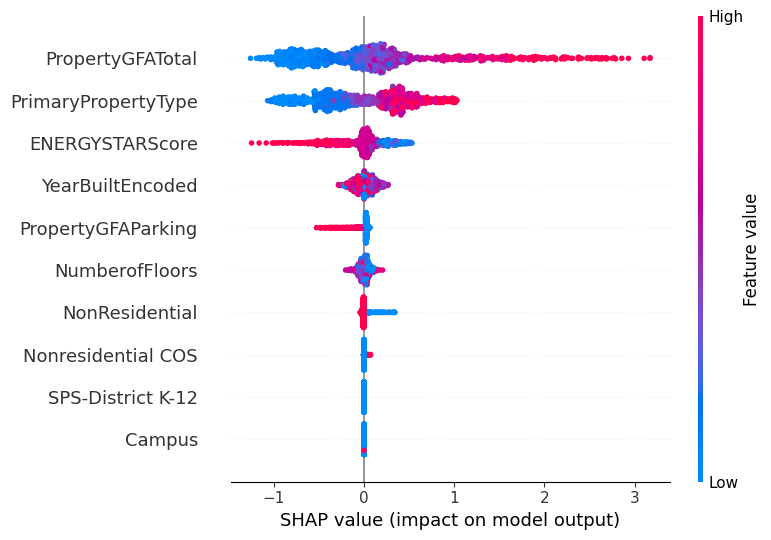

In [ ]:
shap.summary_plot(shap_values, X_train_encoded)

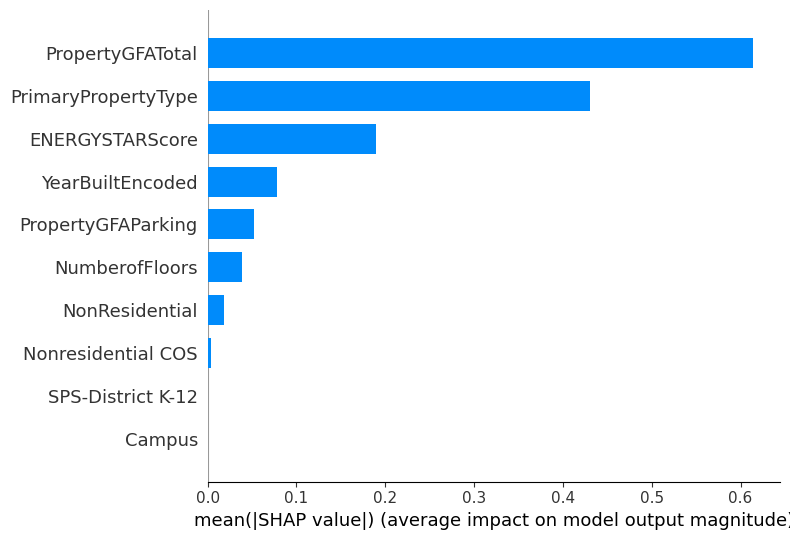

In [ ]:
shap.summary_plot(shap_values, X_train_encoded, plot_type="bar")

>## Utilisation de la méthode du **XGB Regressor**

In [ ]:
X = df_for_prediction.loc[:, ~df_for_prediction.columns.isin(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])]

In [ ]:
y = df_for_prediction['TotalGHGEmissions']

> **Partitionnons les données**

In [ ]:
from sklearn import model_selection

Séparons nos données en un jeu d’entraînement et un jeu de test. Le jeu de test contiendra 30% des données.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3
                                                                    )

In [ ]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

Faire une valid croisée
une randomsearchCv dans la pipeline

In [ ]:
# Création du pipeline
pipeline = Pipeline([
                      ('encoder', TargetEncoder(cols=['PrimaryPropertyType'])),
                      ('regressor', XGBRegressor())
                      ])

In [ ]:
# Création des hyperparamètres à optimiser
hyperparameters = {
    'regressor__n_estimators': [100, 500, 1000],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.5],
    'regressor__subsample': [0.5, 0.7, 1.0],
    'regressor__colsample_bytree': [0.5, 0.7, 1.0]
}

In [ ]:
# Création de l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, hyperparameters, n_iter=10,
                                   scoring={'mse': 'neg_mean_squared_error', 
                                            'mae': 'neg_mean_absolute_error',
                                            'rmse': 'neg_root_mean_squared_error'},
                                   refit='mse', cv=5, n_jobs=-1, verbose=1)

In [ ]:
# Entraînement de l'objet RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('encoder',
                                              TargetEncoder(cols=['PrimaryPropertyType'])),
                                             ('regressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           gpu_id=N...
                   n_jobs=-1,
                   param_distributions={'regressor__colsample_bytree': [0.5,
                                                                        0.7,
                                                                        1.0],
                                        'regressor__learning_rate': [0.01, 0.1,
                                                                     0.5],
                                        'regressor__max_depth': [3, 5, 7],
                                        'regressor__n_estimators': [100, 500,
                                                                    1000],
                                        'regressor__subsample': [0.5, 0.7,
                                                                 1.0]},
                   refit='mse',
                   scoring={'mae': 'neg_mean_absolute_error',
                            'mse': 'neg_mean_squared_error',
                            'rmse': 'neg_root_mean_squared_error'},
                   verbose=1)

> Mesurons le temps d'exécution à l'entrainement

In [ ]:
import time

In [ ]:
# Mesurer le temps d'exécution de la fonction fit()
start_time = time.time()

best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

fit_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction fit(): {:.2f} ms".format(fit_time))

Temps d'exécution de la fonction fit(): 441.15 ms


In [ ]:
# Prédiction sur les données de test
y_pred = random_search.predict(X_test)

> Mesurons le temps d'exécution à la prédiction

In [ ]:
# Mesurer le temps d'exécution de la fonction predict()
start_time = time.time()

y_pred = best_model.predict(X_test)

predict_time = (time.time() - start_time) * 1000  # Transformer le temps en millisecondes
print("Temps d'exécution de la fonction predict(): {:.2f} ms".format(predict_time))

Temps d'exécution de la fonction predict(): 14.53 ms


In [ ]:
# Calculer les paramètres de notation
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'RMSE:{rmse:.4f}')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')

RMSE:0.9533
MAE:0.7654
MSE:0.9088


> Appliquons la **transformation exponentielle sur la RMSE du kBTU** sur les prédictions de votre modèle

In [ ]:
# Calculons les prédictions en exp
y_pred_exp = np.exp(y_pred)

In [ ]:
# Calculons la RMSE en log
rmse_exp = mean_squared_error(np.exp(y_test), y_pred_exp, squared=False)

# Appliquons la transformation exponentielle
rmse_kbtu = rmse_exp

# Afficher les métriques
print("RMSE en kBTU      : ", rmse_kbtu.round(4))

RMSE en kBTU      :  262.2742


> Utilisation de **SHAP** pour **visualiser l'importance des variables**

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
# Récupération du meilleur modèle et de l'encodeur
best_model = random_search.best_estimator_['regressor']
encoder = random_search.best_estimator_['encoder']

In [ ]:
# Encodage des données d'entraînement
X_train_encoded = encoder.transform(X_train)

In [ ]:
# Calcul des valeurs SHAP pour les données d'entraînement
explainer = shap.Explainer(best_model, X_train_encoded)
shap_values = explainer.shap_values(X_train_encoded)

 99%|===================| 1065/1077 [00:45<00:00]       

Le summary plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


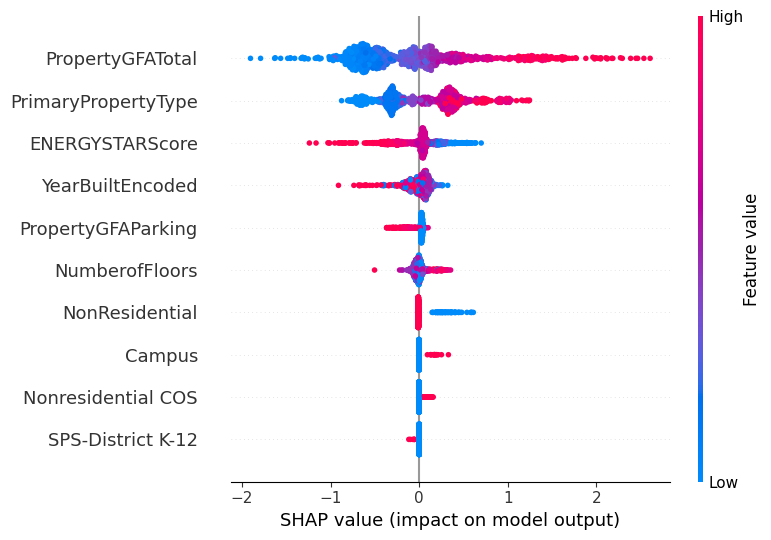

In [ ]:
shap.summary_plot(shap_values, X_train_encoded)

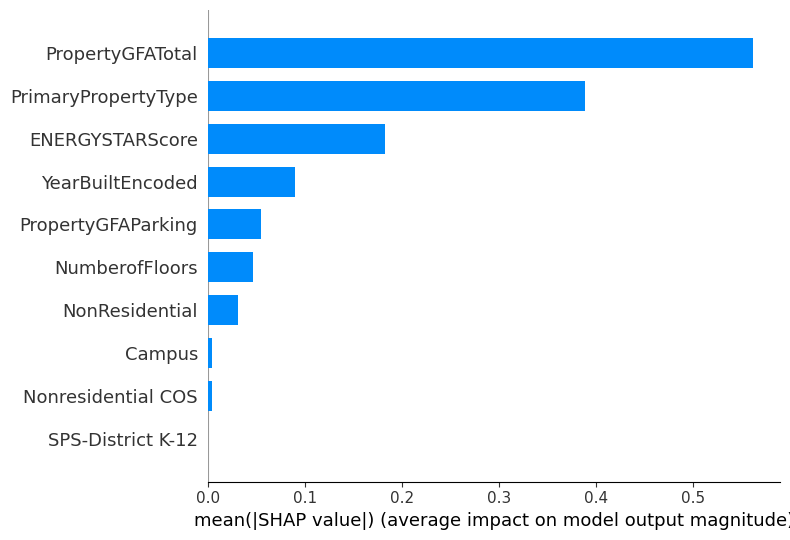

In [ ]:
shap.summary_plot(shap_values, X_train_encoded, plot_type="bar")

# <a name="A5"> **CHOIX DU MEILLEUR MODELE DE PREDICTION**</a>

>>> 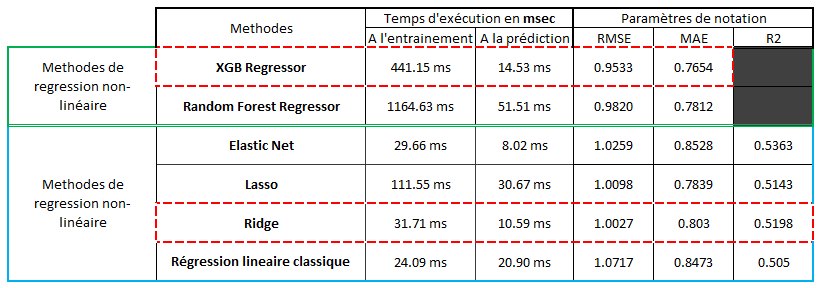

> **Analyse comparative entre les modèles de prediction linéaire**

Constat :

**Temps d'exécution :** 

**Elastic Net** est **le modèle le plus rapide à l'entraînement et à la prédiction**, suivie de Ridge, Lasso, et Régression linéaire classique.


---



**Paramètres de notation :** 

**Lasso a le RMSE le plus faible**, suivi de Ridge, Elastic Net et Régression linéaire classique. 

Lasso a également le MAE le plus faible, suivi de Ridge, Elastic Net et Régression linéaire classique. 

Cependant, Ridge a le R2 le plus élevé, suivi de Elastic Net, Lasso, et Régression linéaire classique.


---



En considérant ces critères, le modèle recommandé dépendra de l'objectif de la tâche. 

- Si la vitesse d'exécution est un facteur clé, Elastic Net peut être le modèle choisi. Si la précision est la priorité absolue, Lasso peut être préféré en raison de son faible RMSE et MAE. 

- **Si l'on recherche une bonne performance de prédiction globale avec un équilibre entre précision et vitesse**, **Ridge** est **le modèle le plus approprié en raison de son R2 plus élevé par rapport aux autres modèles tout en ayant des temps d'exécution raisonnables**. 

- Enfin, si le modèle doit être simple et facile à interpréter, la Régression linéaire classique peut être une option, même s'il a des performances de prédiction légèrement inférieures aux autres modèles.







> **Analyse comparative entre les modèles de prediction non-linéaire**

Constat :

**En termes de temps d'exécution**, le** XGB Regressor** est nettement **plus rapide que le Random Forest Regressor**, aussi bien à l'entrainement qu'à la prédiction. 

Cela peut être un critère important si l'on doit traiter de grandes quantités de données ou si l'on cherche à optimiser les performances d'un système en temps réel.



---



**En ce qui concerne la précision des prédictions**, les deux modèles sont assez proches, avec un RMSE légèrement inférieur pour le XGB Regressor (0.9533 contre 0.9820 pour le Random Forest Regressor) et un MAE également légèrement inférieur pour le XGB Regressor (0.7654 contre 0.7812 pour le Random Forest Regressor).


---



Enfin, **en ce qui concerne la facilité de compréhension et d'interprétation des résultats**, le XGB Regressor peut être plus complexe à paramétrer et à interpréter que le Random Forest Regressor, qui est considéré comme plus intuitif et plus facile à comprendre pour les non-experts.



---



En prenant en compte l'ensemble de ces critères, il semble que le **XGB Regressor soit le modèle de prédiction à privilégier si l'on cherche à optimiser les temps d'exécution tout en conservant une précision de prédiction élevée**. 






>> **CHOIX DU MEILLEUR MODELE DE PREDICTION**

Le temps d'exécution de le modèle Ridge est nettement plus court que celui de le modèle XGB Regressor, **ce qui peut être important si nous devons traiter de grandes quantités de données.**

En fin de compte, il est donc **préférable de choisir le modèle Ridge pour ses performances raisonnables de prédiction, son temps d'exécution court et sa simplicité de modèle.**

>> **Recursive Feature Elimination (RFE) avec le meilleur modèle de Ridge**

In [4]:
from sklearn.feature_selection import RFE

In [31]:
# Extraire le meilleur modèle de la grille de recherche
best_model = grid_search.best_estimator_['ridge_cv']
best_model

RidgeCV(alphas=10.0)

In [32]:
# Sélectionner les colonnes à utiliser pour l'entraînement du modèle RFE
rfe_cols = X.columns.tolist()
rfe_cols

['Campus',
 'NonResidential',
 'Nonresidential COS',
 'SPS-District K-12',
 'PrimaryPropertyType',
 'ENERGYSTARScore',
 'YearBuiltEncoded',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking']

**Déterminons le nombre optimal de fonctionnalités pour notre modèle**

In [33]:
# Définir une plage de nombre de fonctionnalités à tester
n_features_range = range(1, 11)

# Créer des listes pour stocker les scores RMSE et R² pour chaque nombre de fonctionnalités
rmse_scores = []
r2_scores = []

# Boucler sur chaque nombre de fonctionnalités et tester le modèle correspondant
for n in n_features_range:
    # Créer un sélecteur de fonctionnalités récursives (RFE) 
    encoder = grid_search.best_estimator_['target_encoder']
    X_train_encoded = encoder.transform(X_train)

    rfe = RFE(estimator=best_model, n_features_to_select=n, step=1)
    
    # Appliquer le sélecteur de fonctionnalités RFE sur les données d'entraînement
    rfe.fit(X_train_encoded, y_train)
    X_train_rfe = rfe.transform(X_train_encoded)

    X_test_encoded = encoder.transform(X_test)
    X_test_rfe = rfe.transform(X_test_encoded)
    
    # Entraîner un modèle RidgeCV sur les données d'entraînement sélectionnées par RFE
    ridge_model_rfe = RidgeCV(alphas=np.logspace(-4, 4, 9))
    ridge_model_rfe.fit(X_train_rfe, y_train)
    
    # Faire des prédictions sur les données de test sélectionnées par RFE
    y_pred_ridge_rfe = ridge_model_rfe.predict(X_test_rfe)
    
    # Calculer les scores RMSE et R² pour ce nombre de fonctionnalités
    rmse_scores.append(mean_squared_error(y_test, y_pred_ridge_rfe, squared=False))
    r2_scores.append(r2_score(y_test, y_pred_ridge_rfe))

# Trouver l'indice de l'élément dans la liste r2_scores qui a la valeur maximale
max_r2_idx = np.argmax(r2_scores)

# Trouver le nombre de fonctionnalités correspondant à l'indice maximal
optimal_n_features = n_features_range[max_r2_idx]

In [34]:
optimal_n_features

9

In [35]:
# Trouver l'indice de l'élément dans la liste r2_scores qui a la valeur maximale
max_idx = np.argmax(r2_scores)

# Trouver le nombre de features correspondant à l'indice maximal
best_num_features = n_features_range[max_idx]

# Calculer la pente de la courbe RMSE et R2
slope_rmse = np.gradient(rmse_scores)
slope_R2 = np.gradient(rmse_scores)

# Trouver la position (index) où la pente est proche de zéro
plateau_idx_rmse = np.argmin(np.abs(slope_rmse))
plateau_idx_R2 = np.argmin(np.abs(slope_R2))

# Trouver les valeurs X et Y correspondant au plateau de la courbe RMSE
plateau_num_features_rmse = n_features_range[plateau_idx_rmse]
plateau_rmse_score = rmse_scores[plateau_idx_rmse]

# Trouver les valeurs X et Y correspondant au plateau de la courbe R2
plateau_num_features_R2 = n_features_range[plateau_idx_R2]
plateau_r2_scores = r2_scores[plateau_idx_R2]


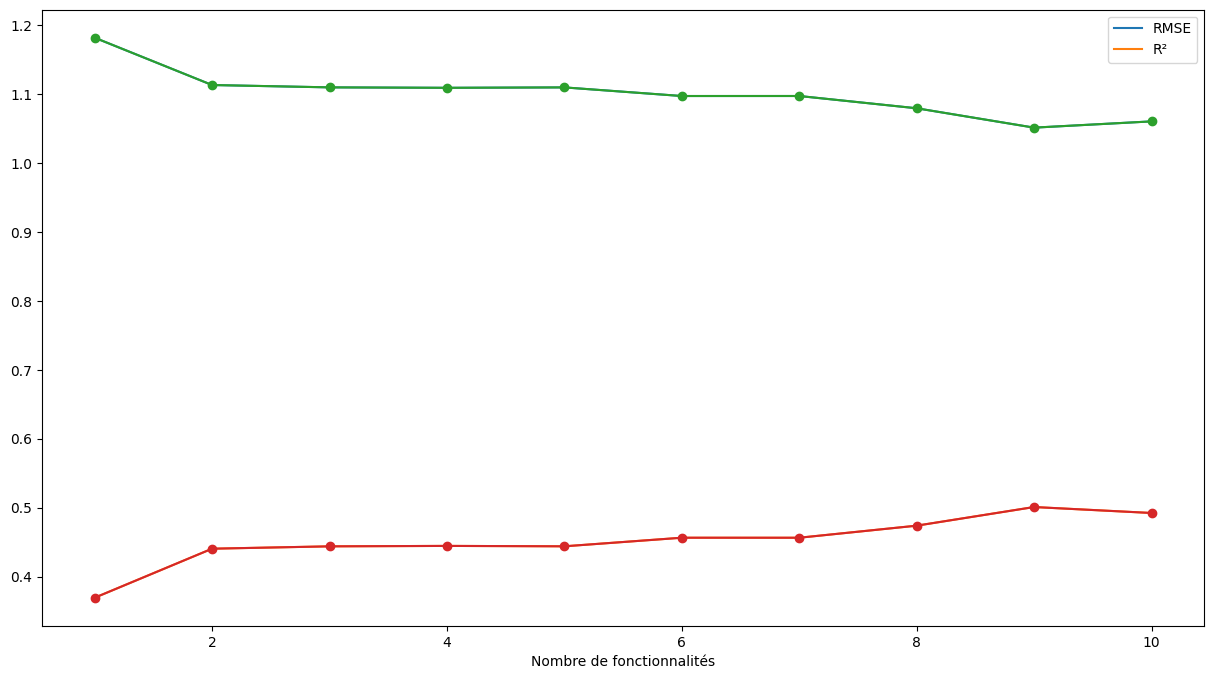

In [38]:
plt.figure(figsize=(15, 8))

# Tracer les courbes RMSE et R² en fonction du nombre de fonctionnalités
plt.plot(n_features_range, rmse_scores, label='RMSE')
plt.plot(n_features_range, r2_scores, label='R²')

plt.plot(n_features_range, rmse_scores, '-o')
plt.plot(n_features_range, r2_scores, '-o')

plt.xlabel('Nombre de fonctionnalités')
plt.legend()
plt.show()

In [44]:
# Sélectionner les fonctionnalités correspondant au nombre optimal de fonctionnalités de 5
rfe = RFE(estimator=best_model, n_features_to_select=4, step=1)

encoder = grid_search.best_estimator_['target_encoder']
X_train_encoded = encoder.transform(X_train)

rfe.fit(X_train_encoded, y_train)

X_train_rfe = rfe.transform(X_train_encoded)

X_test_encoded = encoder.transform(X_test)

X_test_rfe = rfe.transform(X_test_encoded)

In [45]:
# Entraîner le modèle sur les données sélectionnées par RFE
ridge_model_rfe = RidgeCV(alphas=np.logspace(-4, 4, 9))
ridge_model_rfe.fit(X_train_rfe, y_train)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]))

In [46]:
# Faire des prédictions sur les données de test
y_pred_ridge_rfe = ridge_model_rfe.predict(X_test_rfe)

In [47]:
# Évaluer les performances du modèle avec RMSE, MSE et R2
rmse_ridge_rfe = mean_squared_error(y_test, y_pred_ridge_rfe, squared=False)
mse_ridge_rfe = mean_squared_error(y_test, y_pred_ridge_rfe, squared=True)
r2_score_ridge_rfe = r2_score(y_test, y_pred_ridge_rfe)

In [48]:
# Afficher les scores RMSE, MSE et R2
print("RMSE     :", rmse_ridge_rfe.round(3))
print("MSE      :", mse_ridge_rfe.round(3))
print("R2 score :", r2_score_ridge_rfe.round(3))

RMSE     : 1.109
MSE      : 1.23
R2 score : 0.444
